In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

print("system is working fine")

system is working fine


In [2]:


df = pd.read_csv("anonymized_costs.csv")
df.head()


,InvoiceSectionName,Date,MeterCategory,CostInBillingCurrency,MeterSubCategory,MeterName,SubscriptionName,ResourceGroup,ConsumedService,ResourceLocation,ResourceName
0,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Azure App Service,0.000000,Free Plan,F1 App,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,8e04551db18efa5f0d61d169fc2abbc0a0fe47b337d340...,microsoft.web,westeurope,eb7b2b2291b962a3591cb5284020ee75b4c02937fed01c...
1,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Load Balancer,0.018600,Standard,Standard Included LB Rules and Outbound Rules,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,05a92ef059d22b7847bf97a414cbd9b773f230a341f926...,Microsoft.MachineLearningServices,westeurope,55f17ee5c0235396a7acc69e7fc30d917319e3e053d08e...
2,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Storage,0.000004,Tables,GRS Data Stored,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,334f28a0945bbab90ebf4a794cac86f5cfe3aacdc42cd2...,Microsoft.Storage,northeurope,b92f8ef6e1ac3ee7ca538e4b03926bbba53e01f1ce6088...
3,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Load Balancer,0.018600,Standard,Standard Included LB Rules and Outbound Rules,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,05a92ef059d22b7847bf97a414cbd9b773f230a341f926...,Microsoft.MachineLearningServices,westeurope,55f17ee5c0235396a7acc69e7fc30d917319e3e053d08e...
4,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Storage,0.014312,Standard SSD Managed Disks,E2 Disks,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,43c17db9ed1b2f8fb2b00a32c6223f6e6b1e4b9b92b5c3...,Microsoft.Compute,northeurope,c97e6c1b0d7cd5a7a56903385811b0a621aa0873089ab8...


In [3]:
df.shape


(93605, 11)

In [4]:
df.columns


Index(['InvoiceSectionName', 'Date', 'MeterCategory', 'CostInBillingCurrency',
       'MeterSubCategory', 'MeterName', 'SubscriptionName', 'ResourceGroup',
       'ConsumedService', 'ResourceLocation', 'ResourceName'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93605 entries, 0 to 93604
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   InvoiceSectionName     93605 non-null  object 
 1   Date                   93605 non-null  object 
 2   MeterCategory          93605 non-null  object 
 3   CostInBillingCurrency  93605 non-null  float64
 4   MeterSubCategory       93605 non-null  object 
 5   MeterName              93605 non-null  object 
 6   SubscriptionName       93605 non-null  object 
 7   ResourceGroup          93605 non-null  object 
 8   ConsumedService        93605 non-null  object 
 9   ResourceLocation       93605 non-null  object 
 10  ResourceName           93605 non-null  object 
dtypes: float64(1), object(10)
memory usage: 7.9+ MB


In [7]:
df.describe()

,CostInBillingCurrency
count,93605.000000
mean,0.101932
std,0.465012
min,0.000000
25%,0.000002
50%,0.001696
75%,0.028190
max,26.902857


In [8]:
df.isna().sum()

InvoiceSectionName       0
Date                     0
MeterCategory            0
CostInBillingCurrency    0
MeterSubCategory         0
MeterName                0
SubscriptionName         0
ResourceGroup            0
ConsumedService          0
ResourceLocation         0
ResourceName             0
dtype: int64

In [10]:
df.duplicated().sum()

20205

In [11]:
df.isnull().sum()

InvoiceSectionName       0
Date                     0
MeterCategory            0
CostInBillingCurrency    0
MeterSubCategory         0
MeterName                0
SubscriptionName         0
ResourceGroup            0
ConsumedService          0
ResourceLocation         0
ResourceName             0
dtype: int64

In [12]:
if df.duplicated().sum() > 0:
    print("\nSample of duplicated rows:")
    print(df[df.duplicated(keep='first')].head())


    df = df.drop_duplicates()
    print(f"After removing duplicates: {df.shape}")


Sample of duplicated rows:
                                   InvoiceSectionName        Date  \
3   bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...  12/31/2022   
22  bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...  12/26/2022   
61  bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...  12/23/2022   
66  bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...  12/30/2022   
73  bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...  12/29/2022   

       MeterCategory  CostInBillingCurrency           MeterSubCategory  \
3      Load Balancer               0.018600                   Standard   
22     Load Balancer               0.018600                   Standard   
61           Storage               0.021625  Premium SSD Managed Disks   
66           Storage               0.021625  Premium SSD Managed Disks   
73  Virtual Machines               0.028192            Dv2/DSv2 Series   

                                        MeterName  \
3   Standard Included LB Rules and Outbound Rules   
22  St

In [13]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [14]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)


In [16]:
cost_col = "CostInBillingCurrency"

df['rolling_mean_7'] = df[cost_col].rolling(window=7).mean()
df['rolling_std_7'] = df[cost_col].rolling(window=7).std()
df['pct_change'] = df[cost_col].pct_change()

df['zscore'] = (
    (df[cost_col] - df[cost_col].mean()) /
    df[cost_col].std()
)

df.fillna(0, inplace=True)


In [17]:
features = [
    cost_col,
    'rolling_mean_7',
    'rolling_std_7',
    'pct_change',
    'zscore'
]

X = df[features]


In [18]:
features = [
    cost_col,
    'rolling_mean_7',
    'rolling_std_7',
    'pct_change',
    'zscore'
]

X = df[features]


In [22]:
X = df[features]

X = X.replace([np.inf, -np.inf], np.nan)


X = X.fillna(0)


X = X.clip(lower=-1e6, upper=1e6)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
iso_model = IsolationForest(
    n_estimators=300,
    contamination=0.03,
    random_state=42
)

df['if_anomaly'] = iso_model.fit_predict(X_scaled)


In [24]:
df['z_anomaly'] = np.where(np.abs(df['zscore']) > 3, -1, 1)


In [25]:
df['final_anomaly'] = np.where(
    (df['if_anomaly'] == -1) & (df['z_anomaly'] == -1),
    -1,
    1
)

df['final_anomaly'].value_counts()


final_anomaly
 1    72189
-1     1211
Name: count, dtype: int64

In [26]:
df['rf_label'] = df['final_anomaly'].map({1: 0, -1: 1})


In [33]:
# SINGLE clean feature matrix for ALL models
X_clean = df[features].copy()

# Replace infinity
X_clean.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN
X_clean.fillna(0, inplace=True)

# Clip extreme values
X_clean = X_clean.clip(lower=-1e6, upper=1e6)

# Safety check
print("NaN:", X_clean.isna().sum().sum())
print("Inf:", np.isinf(X_clean).sum().sum())
print("Max value:", X_clean.max().max())


NaN: 0
Inf: 0
Max value: 1000000.0


In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)


In [35]:
y_rf = df['rf_label']


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_clean,
    y_rf,
    test_size=0.2,
    random_state=42,
    stratify=y_rf
)


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=300,
                       random_state=42)

In [38]:
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14438
           1       1.00      1.00      1.00       242

    accuracy                           1.00     14680
   macro avg       1.00      1.00      1.00     14680
weighted avg       1.00      1.00      1.00     14680



In [40]:
df['rf_pred'] = rf_model.predict(X_clean)

# Final ensemble decision
df['ultimate_anomaly'] = np.where(
    (df['final_anomaly'] == -1) & (df['rf_pred'] == 1),
    -1,
    1
)

df['ultimate_anomaly'].value_counts()



ultimate_anomaly
 1    72189
-1     1211
Name: count, dtype: int64

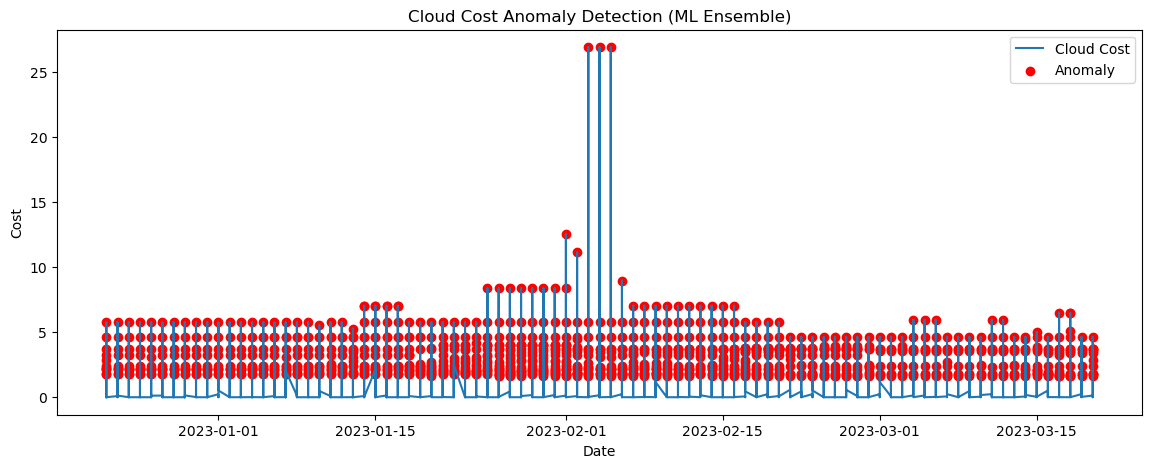

In [41]:
plt.figure(figsize=(14,5))
plt.plot(df['Date'], df[cost_col], label="Cloud Cost")

plt.scatter(
    df[df['ultimate_anomaly'] == -1]['Date'],
    df[df['ultimate_anomaly'] == -1][cost_col],
    color='red',
    label='Anomaly'
)

plt.xlabel("Date")
plt.ylabel("Cost")
plt.title("Cloud Cost Anomaly Detection (ML Ensemble)")
plt.legend()
plt.show()
